# Movie Genre Classification

Movies are a popular means of entertainment all around the world. With a lot of streaming services and websites available and with more on the horizon, building a predictive model that automatically generates the genre of a movie based on the its plot summary is definitely beneficial as it may reduce the expense of manually tagging the movies.

# Data Understanding

## Preprocessing and Exploratory Data Analysis

#### IMPORT NEEDED PACKAGES


In [2]:
import pandas as pd
from google.colab import drive
import re
import numpy as np
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import chardet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import TFBertModel, BertTokenizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import gensim.downloader as api
from google.colab import files



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Data Information

In [ ]:
# Loading the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/train_data.csv'

data = pd.read_csv(file_path, sep=',', engine='python', header=None)

data.columns = ['Source', 'ID', 'TITLE', 'YEAR','CERTIFICATE','RUNTIME','GENRE','RATING','DESCRIPTION',
                'DIRECTOR','DIR_ID','START','S_ID','VOTES','GROSS']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=data

In [ ]:
# Remove the first row
data = data.drop(0)

# Reset the index if needed
data = data.reset_index(drop=True)

In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 363008
Number of attributes = 15


,Source,ID,TITLE,YEAR,CERTIFICATE,RUNTIME,GENRE,RATING,DESCRIPTION,DIRECTOR,DIR_ID,START,S_ID,VOTES,GROSS
0,action.csv,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835,NaN
1,action.csv,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119,NaN
2,action.csv,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220,NaN
3,action.csv,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858,NaN
4,action.csv,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


#### Data Types

In [ ]:
# Printing data types of DataFrame
data.dtypes

Source         object
ID             object
TITLE          object
YEAR           object
CERTIFICATE    object
RUNTIME        object
GENRE          object
RATING         object
DESCRIPTION    object
DIRECTOR       object
DIR_ID         object
START          object
S_ID           object
VOTES          object
GROSS          object
dtype: object

In [ ]:
#remove not used columns
columns_to_keep = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
data = data[columns_to_keep]

In [ ]:
data.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [ ]:
data.head(5)

,ID,TITLE,GENRE,DESCRIPTION
0,tt9114286,Black Panther: Wakanda Forever,"Action, Adventure, Drama",The people of Wakanda fight to protect their h...
1,tt1630029,Avatar: The Way of Water,"Action, Adventure, Fantasy",Jake Sully lives with his newfound family form...
2,tt5884796,Plane,"Action, Thriller",A pilot finds himself caught in a war zone aft...
3,tt6710474,Everything Everywhere All at Once,"Action, Adventure, Comedy",A middle-aged Chinese immigrant is swept up in...
4,tt5433140,Fast X,"Action, Crime, Mystery",Dom Toretto and his family are targeted by the...


#### Dataframe Statistics

In [ ]:
# Printing description of DataFrame
data.describe().T

,count,unique,top,freq
ID,363008,240049,tt1800393,10
TITLE,363004,210942,Alone,53
GENRE,363008,1729,Horror,16050
DESCRIPTION,363008,184988,Add a Plot,66447


In [ ]:
# Remove the first row (index 0) from the DataFrame
data = data.drop(0)

# Reset the index after dropping the row
data.reset_index(drop=True, inplace=True)

# Print the updated DataFrame to verify
data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,tt1630029,Avatar: The Way of Water,"Action, Adventure, Fantasy",Jake Sully lives with his newfound family form...
1,tt5884796,Plane,"Action, Thriller",A pilot finds himself caught in a war zone aft...
2,tt6710474,Everything Everywhere All at Once,"Action, Adventure, Comedy",A middle-aged Chinese immigrant is swept up in...
3,tt5433140,Fast X,"Action, Crime, Mystery",Dom Toretto and his family are targeted by the...
4,tt10954600,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Comedy","Scott Lang and Hope Van Dyne, along with Hank ..."


### Extract unique values of GENRE feature


In [ ]:
# Convert values in 'GENRE' column to lowercase and remove leading/trailing whitespaces
data['GENRE'] = data['GENRE'].str.lower().str.strip()

In [ ]:
# Split the genres for each movie and create a list of all genres
all_genres = [genre.strip() for sublist in data['GENRE'].str.split(',') for genre in sublist]
# Extract unique genre values
unique_genres = set(all_genres)

# Count the unique genre values
num_unique_genres = len(unique_genres)

# Print unique genre values and count
print("Unique Genres:")
for genre in unique_genres:
    print(genre)
print("Number of unique genres:", num_unique_genres)

Unique Genres:
biography
reality-tv
sci-fi
crime
war
mystery
news
thriller
action
western
talk-show
horror
film-noir
drama
history
sport
short
adventure
musical
music
romance
animation
fantasy
game-show
comedy
adult
family
Number of unique genres: 27


### Print them with their frequency

In [ ]:
# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Print unique genres and their counts
print("Unique Genres and Their Counts:")
for genre, count in genre_counts.items():
    print(genre + ":", count)

Unique Genres and Their Counts:
action: 104143
adventure: 60956
fantasy: 31084
thriller: 73797
comedy: 63674
crime: 71083
mystery: 36345
romance: 60140
drama: 135359
war: 11608
sci-fi: 25361
history: 14890
animation: 19018
biography: 13478
horror: 60636
family: 25588
western: 2418
sport: 1527
music: 4966
film-noir: 2541
musical: 5043
adult: 7
game-show: 8
news: 26
reality-tv: 33
talk-show: 3
short: 2


### Plot them with their distribution

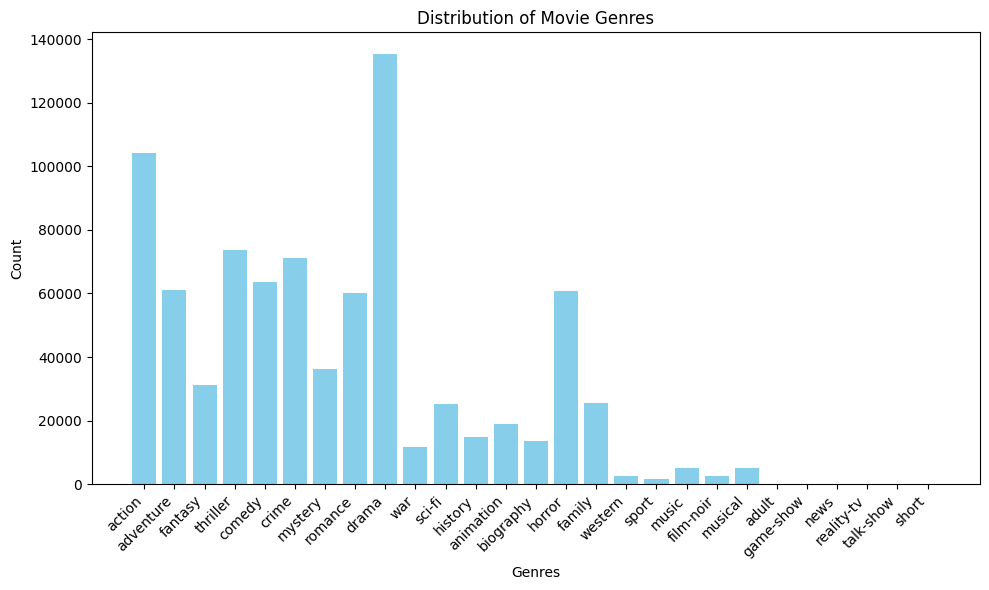

In [ ]:
# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Extract unique genre values
unique_genres = list(genre_counts.keys())

# Extract counts for each genre
genre_values = list(genre_counts.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique_genres, genre_values, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Handling missing values

In [ ]:
# Assuming 'df' is your DataFrame
missing_values_count = df.isnull().sum()
print(missing_values_count)

Source              0
ID                  0
TITLE               4
YEAR            65367
CERTIFICATE    259526
RUNTIME        107684
GENRE               0
RATING         134813
DESCRIPTION         0
DIRECTOR        26455
DIR_ID          26455
START           57117
S_ID            50524
VOTES          134809
GROSS          338447
dtype: int64


In [ ]:
columns_to_check = ['TITLE', 'YEAR', 'CERTIFICATE', 'RUNTIME', 'RATING', 'DIRECTOR', 'START', 'VOTES', 'GROSS']
df.dropna(subset=columns_to_check, inplace=True)



In [ ]:
# Assuming 'df' is your DataFrame
missing_values_count = df.isnull().sum()
print(missing_values_count)

Source         0
ID             0
TITLE          0
YEAR           0
CERTIFICATE    0
RUNTIME        0
GENRE          0
RATING         0
DESCRIPTION    0
DIRECTOR       0
DIR_ID         0
START          0
S_ID           0
VOTES          0
GROSS          0
dtype: int64


#           Data Cleaning and Standardization

 ### Removing HTML tags if the data is scraped from the web

In [ ]:
pip install beautifulsoup4


In [ ]:
from bs4 import BeautifulSoup
# Function to remove HTML tags using BeautifulSoup
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the function to the DESCRIPTION column
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_html_tags)


<ipython-input-21-7393778d96c3>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


 ### Removing special characters

In [ ]:
def remove_special_characters(text):
    # This pattern will keep only letters, numbers, and spaces
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_special_characters)

 ### Removing emojis and  non-standard symbols

In [ ]:
# Function to remove emojis and other non-standard symbols
def remove_emojis_and_symbols(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_emojis_and_symbols)


###   Converting to Lowercase:

In [ ]:
 # Convert DESCRIPTION column to lowercase
data['DESCRIPTION'] = data['DESCRIPTION'].str.lower()


# Print the first few rows to verify the changes
print(data[['DESCRIPTION']].head())

print(data)

                                         DESCRIPTION
0  jake sully lives with his newfound family form...
1  a pilot finds himself caught in a war zone aft...
2  a middleaged chinese immigrant is swept up int...
3  dom toretto and his family are targeted by the...
4  scott lang and hope van dyne along with hank p...
                ID                              TITLE  \
0        tt1630029           Avatar: The Way of Water   
1        tt5884796                              Plane   
2        tt6710474  Everything Everywhere All at Once   
3        tt5433140                             Fast X   
4       tt10954600  Ant-Man and the Wasp: Quantumania   
...            ...                                ...   
363002  tt26698087                          Janissary   
363003  tt26690183                World War 1 project   
363004  tt26695367                                 74   
363005  tt26698193                     Pandora Palace   
363006  tt26733697   Spion 11: Operasjon Traelandsfos  

### Fixing Encoding Issues

In [ ]:
# Open the file in binary mode and read a sample of the data to detect encoding
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read(10000))  # Adjust the number of bytes read as needed

# Use the detected encoding to read the CSV file
df = pd.read_csv(file_path, encoding=result['encoding'])
print(f"Loaded with detected encoding: {result['encoding']}")


Loaded with detected encoding: UTF-8-SIG


In [ ]:
df.head()


,Source.Name,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,action.csv,tt9114286,Black Panther: Wakanda Forever,2022.0,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,action.csv,tt1630029,Avatar: The Way of Water,2022.0,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,action.csv,tt5884796,Plane,2023.0,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,action.csv,tt6710474,Everything Everywhere All at Once,2022.0,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,action.csv,tt5433140,Fast X,2023.0,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


###  Remove Extra Whitespace

In [ ]:
# Assuming 'df' is your DataFrame
string_columns = df.select_dtypes(include=['object']).columns

# Removing extra whitespace
for col in string_columns:
    df[col] = df[col].str.strip()  # Strip leading and trailing whitespace
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # Replace multiple internal spaces

# Verify the changes
print(df.head())


  Source.Name   movie_id                         movie_name    year  \
0  action.csv  tt9114286     Black Panther: Wakanda Forever  2022.0   
1  action.csv  tt1630029           Avatar: The Way of Water  2022.0   
2  action.csv  tt5884796                              Plane  2023.0   
3  action.csv  tt6710474  Everything Everywhere All at Once  2022.0   
4  action.csv  tt5433140                             Fast X  2023.0   

  certificate  runtime                       genre  rating  \
0       PG-13  161 min    Action, Adventure, Drama     6.9   
1       PG-13  192 min  Action, Adventure, Fantasy     7.8   
2           R  107 min            Action, Thriller     6.5   
3           R  139 min   Action, Adventure, Comedy     8.0   
4         NaN      NaN      Action, Crime, Mystery     NaN   

                                         description  \
0  The people of Wakanda fight to protect their h...   
1  Jake Sully lives with his newfound family form...   
2  A pilot finds himself caught 

### Checking Missing Values

In [ ]:
# Handle missing values
data.dropna(inplace=True)

# Check for missing values
assert not data.isnull().values.any(), "Missing values are present in the data."

# Print success message
print("Missing values handled successfully.")

Missing values handled successfully.


### Normalization

In [ ]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Applying Min-Max Scaling to 'rating'
df['rating'] = min_max_scaler.fit_transform(df[['rating']])

# Applying Standard Scaling to 'votes' and 'gross(in $)'
df[['votes', 'gross(in $)']] = standard_scaler.fit_transform(df[['votes', 'gross(in $)']])

# Verify changes
print(df[['rating', 'votes', 'gross(in $)']].head())


     rating     votes  gross(in $)
0  0.655556  3.328685          NaN
1  0.755556  4.868230          NaN
2  0.611111  0.282899          NaN
3  0.777778  5.426503          NaN
4       NaN       NaN          NaN


### Non-informative words

In [ ]:
# Download the set of stop words the first time
nltk.download('stopwords')

# Load the stop words
non_informative_words = set(stopwords.words('english'))

# Assuming you have loaded your DataFrame already; if not, load it here
# df = pd.read_csv('path_to_your_file.csv')

# Define the function to remove non-informative words
def remove_non_informative(text):
    # Split the text into words and remove non-informative words
    return ' '.join(word for word in text.split() if word.lower() not in non_informative_words)

# Apply the function to remove non-informative words from the 'DESCRIPTION' column
df['CLEAN_DESCRIPTION'] = df['description'].apply(remove_non_informative)

# Optionally, check again for non-informative words in 'CLEAN_DESCRIPTION'
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].apply(
    lambda x: any(word.lower() in non_informative_words for word in x.split())
)

# Display the DataFrame to verify the removal and create a summary
display_df = df[['CLEAN_DESCRIPTION', 'contains_non_informative']]
summary = {'Non-informative Words Removed': not df['contains_non_informative'].any()}

print(display_df.head())  # Display first few rows to check
print(summary)  # Display summary of checks


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   CLEAN_DESCRIPTION  contains_non_informative
0  people Wakanda fight protect home intervening ...                     False
1  Jake Sully lives newfound family formed extras...                     False
2  pilot finds caught war zone he's forced land c...                     False
3  middle-aged Chinese immigrant swept insane adv...                     False
4  Dom Toretto family targeted vengeful son drug ...                     False
{'Non-informative Words Removed': True}


### checking cleanliness

In [ ]:
# Define functions for cleaning
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_emojis_and_symbols(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)

# Apply cleaning functions
df['description'] = df['description'].apply(remove_html_tags).apply(remove_special_characters).apply(remove_emojis_and_symbols)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Download and prepare stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove non-informative words
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word.lower() not in stop_words)

df['CLEAN_DESCRIPTION'] = df['description'].apply(remove_stop_words)

# Filling missing values appropriately
#df.fillna({'year': 0, 'rating': df['rating'].mean(), 'votes': 0, 'gross(in $)': 0}, inplace=True)
#df.fillna('unknown', inplace=True)

# Apply scaling
scaler = MinMaxScaler()
#df['rating'] = scaler.fit_transform(df[['rating']])
standard_scaler = StandardScaler()
#df[['votes', 'gross(in $)']] = standard_scaler.fit_transform(df[['votes', 'gross(in $)']])

# Removing extra whitespace
df = df.applymap(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)

# Verification steps
df['contains_html'] = df['description'].apply(lambda x: bool(BeautifulSoup(x, "html.parser").find()))
df['contains_special'] = df['description'].str.contains(r'[^a-zA-Z0-9\s]')
df['contains_stop'] = df['CLEAN_DESCRIPTION'].apply(lambda x: any(word in stop_words for word in x.split()))
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].str.contains(r'\b(' + '|'.join(stop_words) + r')\b')

summary = {
    'HTML Tags Removed': not df['contains_html'].any(),
    'Special Characters Removed': not df['contains_special'].any(),
    'Non-informative Words Removed': not df['contains_non_informative'].any(),
    'Stop Words Removed': not df['contains_stop'].any()
}

print(summary)


<ipython-input-31-4bc0b4dc900e>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-31-4bc0b4dc900e>:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].str.contains(r'\b(' + '|'.join(stop_words) + r')\b')


{'HTML Tags Removed': True, 'Special Characters Removed': True, 'Non-informative Words Removed': True, 'Stop Words Removed': True}


### Handling numbers

In [ ]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e12b36e38cddbe8537066013a3d19d609e12dd4547dc018955dfbdecbb9904c8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


### Tokenization, Stop Words Removal, and Handling Negations:

In [ ]:
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Negation handling function
def handle_negation(tokens):
    negation_terms = ['not', 'no', 'never', "n't", 'nothing', 'nowhere', 'neither', 'nor']
    transformed_tokens = []
    negation_active = False

    for token in tokens:
        if token in negation_terms:
            negation_active = True
        elif negation_active:
            transformed_tokens.append(f"not_{token}")
            negation_active = False
        else:
            transformed_tokens.append(token)

    return transformed_tokens

# Apply tokenization
df['tokens'] = df['CLEAN_DESCRIPTION'].apply(tokenize_text)

# Apply negation handling
df['handled_negations'] = df['tokens'].apply(handle_negation)

# Display the DataFrame to verify negation handling
print(df[['tokens', 'handled_negations']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              tokens  \
0  [people, wakanda, fight, protect, home, interv...   
1  [jake, sully, lives, newfound, family, formed,...   
2  [pilot, finds, caught, war, zone, hes, forced,...   
3  [middleaged, chinese, immigrant, swept, insane...   
4  [dom, toretto, family, targeted, vengeful, son...   

                                   handled_negations  
0  [people, wakanda, fight, protect, home, interv...  
1  [jake, sully, lives, newfound, family, formed,...  
2  [pilot, finds, caught, war, zone, hes, forced,...  
3  [middleaged, chinese, immigrant, swept, insane...  
4  [dom, toretto, family, targeted, vengeful, son...  


### Lemmatization

In [ ]:
!pip install spacy

In [ ]:
# Load spaCy English model with only the tokenizer and tagger since that's enough for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Define the lemmatization function with nlp model as a parameter
def lemmatize_text(text, nlp):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Function to process in batches
def process_text_in_batches(dataframe, column_name):
    chunk_size = 500  # Adjust the chunk size based on your system's capability
    num_chunks = len(dataframe) // chunk_size + 1

    lemmatized_texts = []
    for i in tqdm(range(num_chunks)):
        batch = dataframe[column_name][i*chunk_size:(i+1)*chunk_size]
        lemmatized_batch = batch.apply(lambda text: lemmatize_text(text, nlp))
        lemmatized_texts.extend(lemmatized_batch)

    return lemmatized_texts

# Applying batch processing
df['lemmatized_description'] = process_text_in_batches(df, 'CLEAN_DESCRIPTION')

100%|██████████| 727/727 [25:37<00:00,  2.11s/it]


In [ ]:
# Loading the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/lemmatized_dataset.csv'
data = pd.read_csv(file_path, sep=',', engine='python', header=None)

In [ ]:
# Ensure the GloVe model is loaded (consider handling this with try-except to catch loading issues)
glove_model = api.load("glove-wiki-gigaword-50")

# Define the function to create document vectors
def document_vector(tokens, model):
    filtered_tokens = [token for token in tokens if token in model.key_to_index]
    if not filtered_tokens:
        return np.zeros(model.vector_size)
    return np.mean(model[filtered_tokens], axis=0)

# Apply the document vector function to a tokens column that should exist
# Ensure 'tokens' column exists and contains pre-tokenized data as lists of words
if 'tokens' in df.columns:
    df['vector'] = df['tokens'].apply(lambda tokens: document_vector(tokens, glove_model))
else:
    print("Error: 'tokens' column does not exist.")

# Check that the 'vector' column has been created successfully
if 'vector' not in df.columns:
    print("Vector column creation failed.")
else:
    print("Vector column created successfully.")


[==================================================] 100.0% 66.0/66.0MB downloaded
Vector column created successfully.


In [ ]:
# Define a mapping of genres to aggregated genres
genre_aggregation = {
    'horror': 'Horror',
    'action': 'Action',
    'thriller': 'Thriller',
    'drama, romance': 'Romance',
    'action, crime, drama': 'Crime Drama',
    # Add other mappings
}

# Map genres to aggregated genres
df['aggregated_genre'] = df['genre'].replace(regex=genre_aggregation)

# Now, we reduce the genres to top N and 'other'
top_n = 10
top_genres = df['aggregated_genre'].value_counts().nlargest(top_n).index
df['final_genre'] = df['aggregated_genre'].apply(lambda x: x if x in top_genres else 'Other')

# Check the new distribution
print(df['final_genre'].value_counts(normalize=True))


final_genre
Other                   0.727381
Horror                  0.044214
Action                  0.039889
Thriller                0.039575
Romance                 0.034302
Action, crime, drama    0.026666
romance                 0.019730
Horror, Thriller        0.019289
comedy, romance         0.019253
crime, drama            0.015248
comedy, Romance         0.014454
Name: proportion, dtype: float64


In [ ]:
# Perform PCA on vectors
pca = PCA(n_components=50)
reduced_vectors = pca.fit_transform(list(df['vector']))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_vectors, df['genre'], test_size=0.2, random_state=42)


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['final_genre'])
X_train, X_test, y_train, y_test = train_test_split(reduced_vectors, y_encoded, test_size=0.2, random_state=42)

# Train a simple Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7666455469546294


In [ ]:
# Model Hyperparameter Tuning

In [ ]:
# Ensure the GloVe vectors are applied
if 'vector' in df.columns:
    # Prepare the features and labels
    X = np.stack(df['vector'].values)  # Convert list of vectors into a 2D array
    y = df['final_genre']

    # Encode the labels to be used in the model
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Train the XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Vector column not found. Ensure your vectorization step is correct.")


Accuracy: 0.7306685766232335


In [ ]:
# Advanced Model Architecture

In [ ]:
# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Calculate and print the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)


In [ ]:
# Feature Engineering

In [ ]:
### Feature Scaling: Standardize features by removing the mean and scaling to unit variance

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy with Scaled Features:", accuracy_score(y_test, y_pred))


In [ ]:
# Ensemble Techniques

In [ ]:
# Create sub-models
model1 = RandomForestClassifier(n_estimators=300, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)

# Create a voting classifier
ensemble = VotingClassifier(estimators=[
    ('rf', model1), ('gb', model2)],
    voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))


In [ ]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#

In [ ]:
# Load tokenizer and BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

# Prepare the dataset
def prepare_data(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
    return np.array(encodings['input_ids']), np.array(labels)

X_train_ids, y_train_encoded = prepare_data(X_train, y_train)
X_test_ids, y_test_encoded = prepare_data(X_test, y_test)

# Build the model
input_ids = Input(shape=(512,), dtype=tf.int32)
bert_output = bert(input_ids)[1]
out = Dense(len(np.unique(y_train)), activation='softmax')(bert_output)

model = Model(inputs=input_ids, outputs=out)
model.compile(optimizer=Adam(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_ids, y_train_encoded, validation_split=0.1, epochs=3, batch_size=8)

# Evaluate the model
eval_results = model.evaluate(X_test_ids, y_test_encoded)
print(f"Neural Network Accuracy: {eval_results[1]:.2f}")
